# Data Loading and EDA

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
import os
from IPython.display import Image
from matplotlib import style
style.use("ggplot")
import seaborn as sns; sns.set()
from string import ascii_letters
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz

os.getcwd() 
os.chdir('/Users/DHY/Desktop')
df=pd.read_csv('india_all_nolabel.csv', sep=',')
df_light=df

In [19]:
missingount=df.isnull().sum()
df_light=df_light.dropna(subset = ['HAZ'])
df_light=df_light.dropna(subset = ['WAZ'])
df_light=df_light.dropna(subset = ['WHZ'])
df_light=df_light.dropna(subset = ['age_mother'])
df_light=df_light.dropna(subset = ['edu_mother'])
df_light=df_light.dropna(subset = ['weight_mother'])
df_light=df_light.dropna(subset = ['height_mother'])
df_light=df_light.dropna(subset = ['BMI_mother'])
missingount=df_light.isnull().sum()

# Build correlation heatmap 

In [20]:

listofcol=['birthorder', 
 'alive_mother', 'alive_father', 'age_child','weight_child', 'height_child', 'gender_child',
 'birthday_child',  'liveinhh_mother', 'liveinhh_father',
 'HAZ', 'WHZ', 'WAZ', 'interview', 'hhsize_dejure', 'hhsize_defacto', 'under5', 'region', 'residence',
 'drinkingwater', 'water_time', 'toilet', 'floor', 'wall', 'roof', 'room_sleeping',
 'cooking_fuel', 'net', 'washhands', 'salt', 'water_treat',
 'agri_ownership', 'bank', 'wealth_index', 'caste_tribe', 'house_ownership', 
 'insurance', 'bpl', 'death_maternal',
 'age_father', 'weight_father', 'height_father',
 'birthday_father', 'BMI_father', 'hemoglobin_father', 'edu_father', 'thin_father',
 'overweight_father', 'birthday_mother', 'age_mother', 'edu_mother', 'weight_mother',
 'height_mother', 'BMI_mother', 'hemoglobin_mother', 'thin_mother', 'overweight_mother',
 'death_under5', 'breastlessthan1', 'excl_feeding', 'compl_food', 'diversity']

sns.set(style="white")
corr = df_light.corr()
corr=corr.sort_values(by=listofcol, ascending=False, na_position='first')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('heatmap.pdf')

# Data cleaning rule 
1) Keep as much as data possible (Threshold 90% of trimmed dataset from above)
2) Result : Total 99 variables to 63 variables  (N=240276 -> 224157) 

In [21]:

df_light=df_light.dropna(thresh=0.9*len(df_light), axis=1) 


* Result : Total 99 variables to 63 variables     (N=240276 -> 224157 -> 207254)

In [22]:
missingount=df_light.isnull().sum()
df_light.columns[df_light.isnull().any()] 
varnams=['stunt', 'svr_stunt', 'wast', 'svr_wast', 'underweight','svr_underweight', 'washhands_water', 'washhands_soap','cooking_location', 'caste_tribe_type', 'hemoglobin_mother']
for varnam in varnams:
    df_light=df_light.dropna(subset = [varnam])
df_light=df_light.dropna(thresh=1*len(df_light), axis=1)
(len(df_light)*1.00000/len(df)*1.00000 ) # Kept 86% of original dataset (loss: 14%) 

df_light.to_csv('./india_edaready.csv',sep=',')

* Drop ID-related variables for analysis
* Result : total 43 variables left 

In [23]:
 
df_light=df_light.drop(['cluster', 'hhnum', 'line_child', 'line_mother', 'line_father', 'birthday_child', 
                        'sw', 'liveinhh_mother', 'liveinhh_father','interview','birthday_mother',
                        'stunt', 'svr_stunt', 'wast', 'svr_wast', 'underweight','svr_underweight',
                        'weight_child', 'height_child','age_child'
                        ], axis=1)


# EDA Summary : 
Fifty-two variables remained from data cleaning by 1) keeping variables with more than 90% responses
 and 2) exclude ID-related (biologically implausible) variables, and 3) exclude highly correlated variables and kept more representable variables such as keeping age instead of birthday variable


In [24]:
tablecount2=pd.crosstab(index=df_light['gender_child'], columns="count") 
tablecount3=pd.crosstab(index=df_light['wealth_index'], columns="count") 
tablecount4=pd.crosstab(index=df_light['edu_mother'], columns="count") 

In [10]:
df_whz=df_light
df_whz['target']=0
df_whz.loc[(df_light['WHZ'] <=-2), 'target'] = 1
df_whz.loc[(df_light['WHZ'] >=2), 'target'] = 1
df_whz['target_names']="Normal Range"
df_whz.loc[(df_light['WHZ'] <=-2), 'target_names'] ="Severe"
df_whz.loc[(df_light['WHZ'] >=2), 'target_names'] = "Severe"
pd.crosstab(index=df_whz['target_names'], columns="count") # 23.05% of severe WHZ cases 
df_whz=df_whz.drop(['HAZ','WAZ','WHZ'], axis=1)
# check values for water time  

# Tree analysis 

In [12]:
# Include all variables
df_whz_ses=df_whz
df_whz_ses = df_whz_ses[df_whz_ses['wall']<=40] 
df_whz_ses = df_whz_ses[df_whz_ses['roof']<=40] 
df_whz_ses = df_whz_ses[df_whz_ses['toilet']<=40] 

# Include SES only 
df_whz_ses=df_whz.drop(['weight_mother', 'height_mother', 'BMI_mother'], axis=1)
df_whz_ses = df_whz_ses[df_whz_ses['wall']<=40] 
df_whz_ses = df_whz_ses[df_whz_ses['roof']<=40] 
df_whz_ses = df_whz_ses[df_whz_ses['toilet']<=40] 
df_whz_X=df_whz_ses
df_whz_X=df_whz_X.drop(['target','target_names'], axis=1)
X=df_whz_X.values
y=df_whz_ses['target'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
sc = StandardScaler()
sc.fit(X_train)
    
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
    
whz_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=0)
whz_tree.fit(X_train, y_train)    

print("Training set accuracy: {:.3f}".format(whz_tree.score(X_train, y_train)))
print("Test Set accuracy: {:.3f}".format(whz_tree.score(X_test, y_test)))    
colnam=pd.Series(df_whz_X.columns.tolist()).values
def plot_feature_importances(model):
    n_features = df_whz_X.shape[1]
    fig = plt.figure(figsize=(5,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), colnam)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Impact on WHZ indicator")
    plt.ylim(-1, n_features)

plot_feature_importances(whz_tree)

#dot_data = export_graphviz(whz_tree, out_file=None,feature_names=colnam,class_names=df_whz.target_names, filled=True, rounded=True ,impurity=False)
#graph = pydotplus.graph_from_dot_data(dot_data)
#from IPython.display import Image
#Image(graph.create_png())

Training set accuracy: 0.769
Test Set accuracy: 0.767


Run below for prediction score check 

In [14]:
# =============================================================================
# dot_data = export_graphviz(whz_tree, out_file=None,feature_names=colnam,class_names=df_whz_ses_balance.target_names, filled=True, rounded=True ,impurity=False)
# dot_data = export_graphviz(whz_tree, out_file=None,feature_names=colnam,impurity=False)
# 
# graph = pydotplus.graph_from_dot_data(dot_data)
# from IPython.display import Image
# Image(graph.create_png())
# 

# df_whz=df_whz
# df_whz_X=df_whz
# df_whz_X=df_whz_X.drop(['target','target_names'], axis=1)
# X=df_whz_X.values
# y=df_whz['target'].values
# 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 
# sc = StandardScaler()
# sc.fit(X_train)
# 
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)
# 
# whz_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
# whz_tree.fit(X_train, y_train)
# 
# #y_pred_tr = whz_tree.predict(X_test)
# #print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))
# print("Training set accuracy: {:.3f}".format(whz_tree.score(X_train, y_train)))
# print("Test Set accuracy: {:.3f}".format(whz_tree.score(X_test, y_test)))
# 
# # vizualization
# colnam=pd.Series(df_whz_X.columns.tolist()).values
# 
# #print("Feature importance:\n{}".format(whz_tree.feature_importances_))
#dot_data = export_graphviz(whz_tree, out_file=None, feature_names=colnam,class_names=df_whz.target_names, filled=True, rounded=True ,impurity=False )
#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())
# =============================================================================


# K-mean cluster analysis
select var from tree-model and run cluster analysis 
selected variables from tree analysis:  ['wealth_index','hemoglobin_mother', 'wall', 'roof','toilet','region']

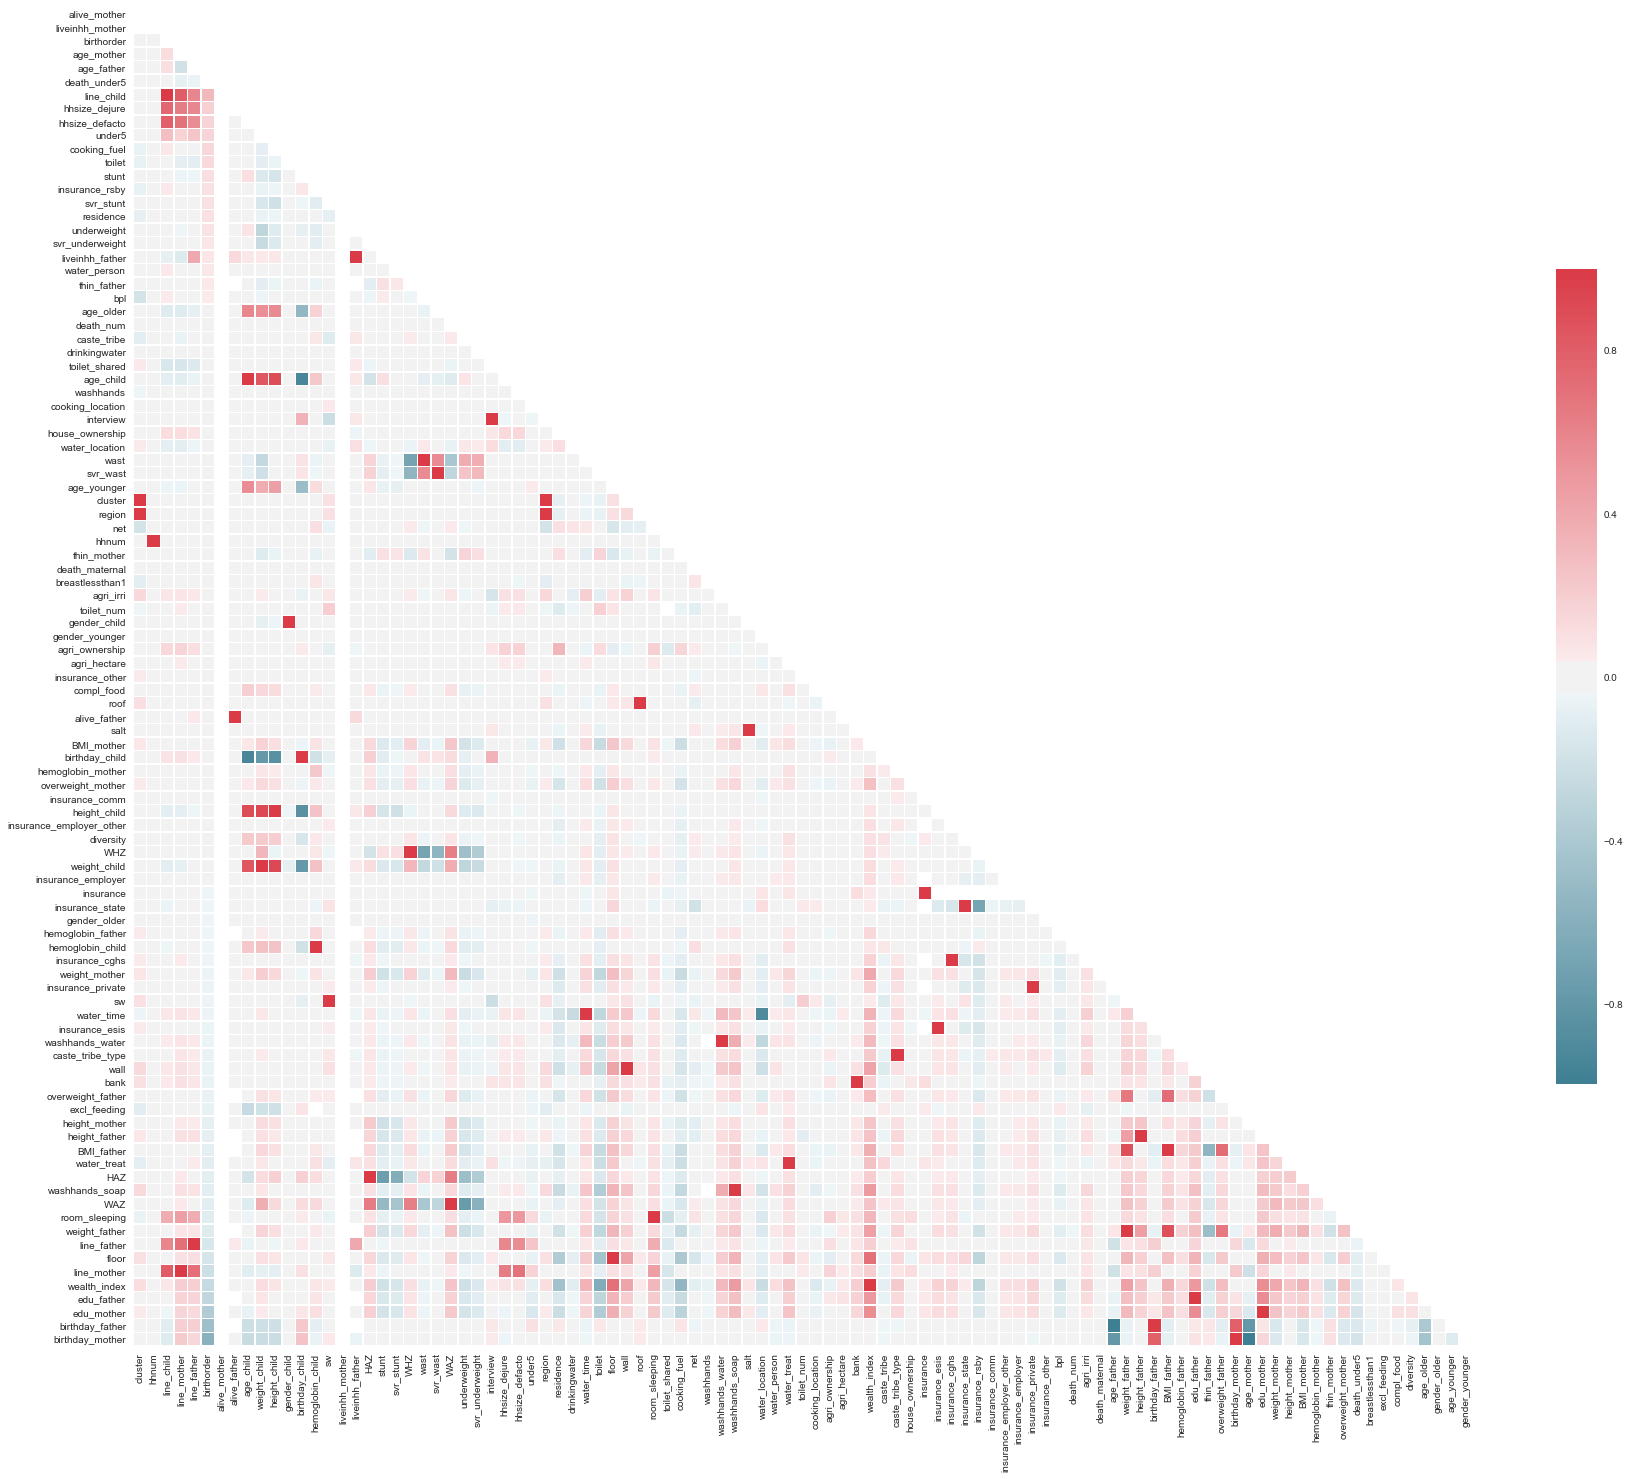

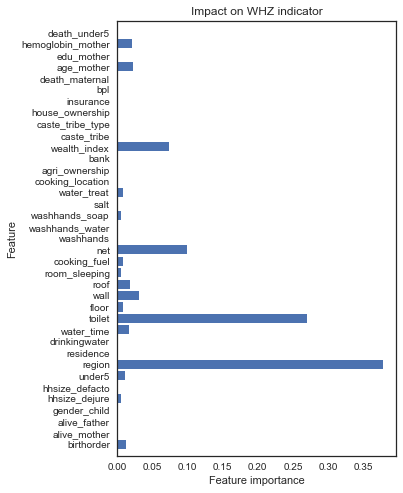

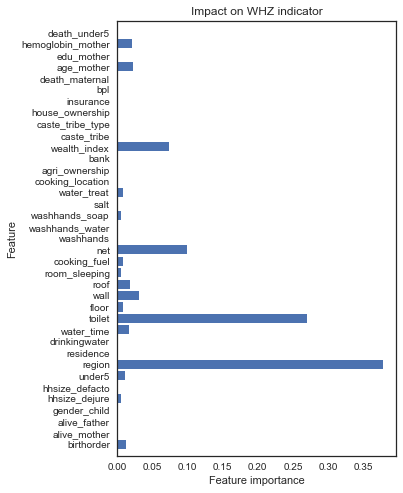

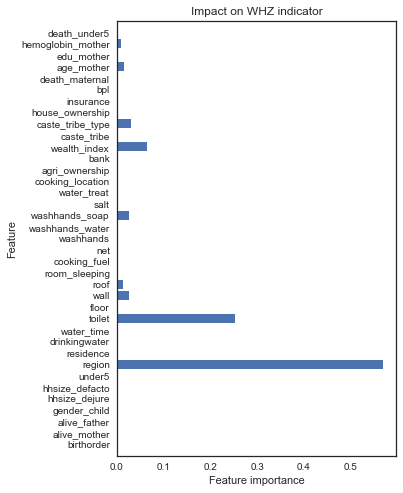

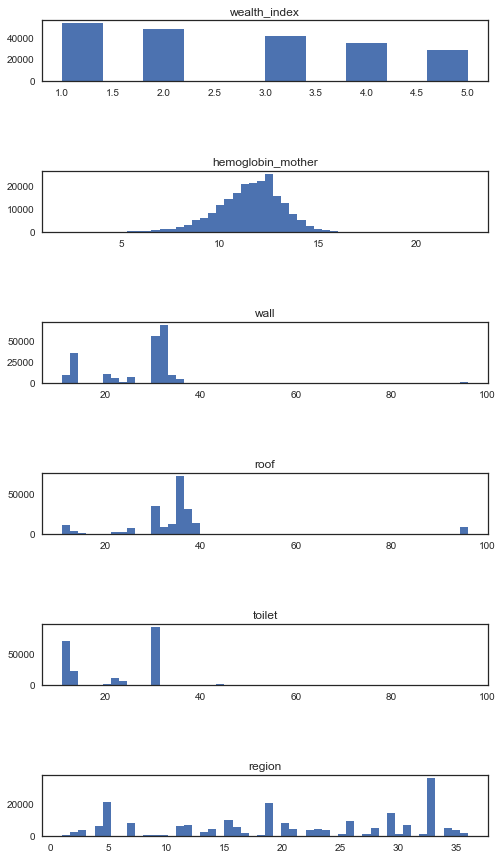

In [15]:

fig = plt.figure(figsize=(8,15))
 
plt.subplot(6, 1, 1)
fig.subplots_adjust(hspace=1.5)
plt.hist(df_whz_ses.wealth_index)
plt.legend(bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.title('wealth_index')
 
plt.subplot(6, 1, 2)
fig.subplots_adjust(hspace=1.5)
plt.hist(df_whz_ses.hemoglobin_mother,bins=50)
plt.legend(bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.title('hemoglobin_mother')

plt.subplot(6, 1, 3)
fig.subplots_adjust(hspace=1.5)
plt.hist(df_whz_ses.wall,bins=50)
plt.legend(bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.title('wall')
 
plt.subplot(6, 1, 4)
fig.subplots_adjust(hspace=1.5)
plt.hist(df_whz_ses.roof,bins=50)
plt.legend(bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.title('roof')

plt.subplot(6, 1, 5)
fig.subplots_adjust(hspace=1.5)
plt.hist(df_whz_ses.toilet,bins=50)
plt.legend(bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.title('toilet')

plt.subplot(6, 1, 6)
fig.subplots_adjust(hspace=1.5)
plt.hist(df_whz_ses.region,bins=50)
plt.legend(bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.title('region')

plt.show() 


In [16]:
df_whz_ses = df_whz_ses[df_whz_ses['wall']<=40] 
df_whz_ses = df_whz_ses[df_whz_ses['roof']<=40] 
df_whz_ses = df_whz_ses[df_whz_ses['toilet']<=40] 

df_whz_ses['hemoglobin_mother_r']=pd.qcut(df_whz_ses['hemoglobin_mother'], 10, labels=False , duplicates='drop' )
df_whz_ses['wall_r']=pd.qcut(df_whz_ses['wall'], 10, labels=False, duplicates='drop')
df_whz_ses['roof_r']=pd.qcut(df_whz_ses['roof'], 10, labels=False, duplicates='drop')
df_whz_ses['toilet_r']=pd.qcut(df_whz_ses['toilet'], 10, labels=False, duplicates='drop')
df_whz_ses['region_r']=pd.qcut(df_whz_ses['region'], 10, labels=False, duplicates='drop')

k=3        
df_final=df_whz_ses.dropna()
df_out_ID=df_final # df_final still contains ID but cleaned out 
df_final=df_final[['wealth_index','hemoglobin_mother_r', 'wall_r', 'roof_r','toilet_r','region_r']]
np.random.seed(0)
km=KMeans(k).fit(df_final)
df_final['label']=km.labels_
df_out_ID['label']=df_final['label']
dfkmfinal = df_final 


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


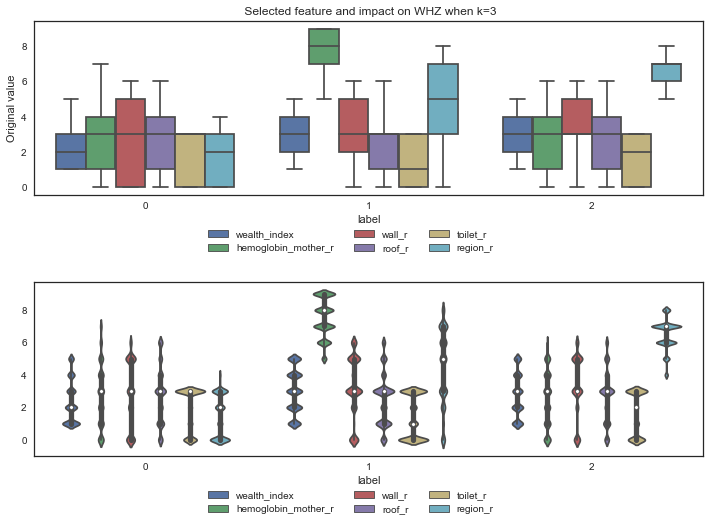

In [17]:
dd=pd.melt(dfkmfinal,id_vars=['label'],value_vars=['wealth_index','hemoglobin_mother_r', 'wall_r', 'roof_r','toilet_r','region_r'],var_name='Clusters')

fig = plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
sns.boxplot(x='label',y='value',data=dd,hue='Clusters',showfliers=False)
plt.legend(bbox_to_anchor=(.7, -.15), ncol=3)
plt.ylabel('Original value')
plt.title(' Selected feature and impact on WHZ when k='+str(k))
fig.subplots_adjust(hspace=0.5)
plt.subplot(2, 1, 2)
sns.violinplot(x='label',y='value',data=dd,hue='Clusters')
plt.legend(bbox_to_anchor=(0.7, -.15), ncol=3)
plt.ylabel('')
plt.show()

In [25]:
df_out_ID.groupby('label')[['wealth_index','hemoglobin_mother_r', 'wall_r', 'roof_r','toilet_r','region_r']].mean()

,wealth_index,hemoglobin_mother_r,wall_r,roof_r,toilet_r,region_r
label,,,,,,
0,2.397177,2.771746,2.847654,2.774902,1.986801,1.469029
1,3.005155,7.504130,3.210038,2.526716,1.424219,4.469379
2,2.771310,2.482308,3.306990,2.706336,1.642561,6.496643


In [26]:
df_out_ID.groupby('label')[['wealth_index','hemoglobin_mother', 'wall', 'roof','toilet','region']].mean()

,wealth_index,hemoglobin_mother,wall,roof,toilet,region
label,,,,,,
0,2.397177,10.737718,25.674218,32.497065,23.641123,10.298897
1,3.005155,13.094922,27.663530,32.325191,19.752739,21.941833
2,2.771310,10.594482,28.051875,32.338790,21.399311,29.957901


In [28]:
df_out_ID.groupby('label')[['wealth_index','hemoglobin_mother', 'wall', 'roof','toilet','region']].agg(['min','max','mean','count']).transpose()

label                               0             1             2
wealth_index      min        1.000000      1.000000      1.000000
                  max        5.000000      5.000000      5.000000
                  mean       2.397177      3.005155      2.771310
                  count  67806.000000  71192.000000  57484.000000
hemoglobin_mother min        2.000000     11.800000      2.000000
                  max       12.900000     22.600000     12.400000
                  mean      10.737718     13.094922     10.594482
                  count  67806.000000  71192.000000  57484.000000
wall              min       11.000000     11.000000     11.000000
                  max       36.000000     36.000000     36.000000
                  mean      25.674218     27.663530     28.051875
                  count  67806.000000  71192.000000  57484.000000
roof              min       11.000000     11.000000     11.000000
                  max       39.000000     39.000000     39.000000
                  mean      32.497065     32.325191     32.338790
                  count  67806.000000  71192.000000  57484.000000
toilet            min       11.000000     11.000000     11.000000
                  max       31.000000     31.000000     31.000000
                  mean      23.641123     19.752739     21.399311
                  count  67806.000000  71192.000000  57484.000000
region            min        1.000000      1.000000     20.000000
                  max       20.000000     36.000000     36.000000
                  mean      10.298897     21.941833     29.957901
                  count  67806.000000  71192.000000  57484.000000